In [276]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

In [289]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('BTC_train.csv')
# Lấy cột "Date" làm feature và chuyển đổi về numpy array
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Lấy cột "Open" làm feature và chuyển đổi về numpy array
X = df['Open'].values.reshape(-1, 1)

# Lấy cột "Close" làm target và chuyển đổi về numpy array
y = df['Price'].values
# Sử dụng kernel RBF
kernel = C(1.0, (1e-3, 1e6)) * RBF(length_scale_bounds=(1e-2, 500000.0))
# Tạo mô hình Gaussian Process
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


In [ ]:
# Huấn luyện mô hình

gp.fit(X, y)


In [285]:
# Dự đoán giá Bitcoin trong 10 ngày tiếp theo
# test['Date'] = pd.to_datetime(test['Date'])
# last_value = test['Date'].head(1).values[0]
# dates = pd.date_range(last_value, periods=n_t, freq='D')
# X_pred = np.array(test['Open']).reshape(-1, 1) 
# y_pred, sigma = gp.predict(X_pred, return_std=True)

test_df = pd.read_csv('BTC_test.csv')
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df = test_df.set_index('Date')
X_pred = test_df['Open'].values.reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

In [287]:
# Làm tròn các giá trị của y_pred và sigma đến 2 chữ số thập phân
y_pred_rounded = np.around(y_pred, decimals=2)
sigma_rounded = np.around(sigma, decimals=2)

# In ra kết quả dự đoán
for i in range(len(test_df)):
    date = test_df.index[i].strftime("%Y-%m-%d")
    print(f'{date}: {float(y_pred_rounded[i]):.2f} +/- {float(sigma_rounded[i]):.2f}')

2022-04-04: 0.00 +/- 1.00
2022-04-05: 0.00 +/- 1.00
2022-04-06: 0.00 +/- 1.00
2022-04-07: 0.00 +/- 1.00
2022-04-08: 0.00 +/- 1.00
2022-04-09: 0.00 +/- 1.00
2022-04-10: 0.00 +/- 1.00
2022-04-11: 0.00 +/- 1.00
2022-04-12: 0.00 +/- 1.00
2022-04-13: 0.00 +/- 1.00
2022-04-14: 0.00 +/- 1.00
2022-04-15: 0.00 +/- 1.00
2022-04-16: 0.00 +/- 1.00
2022-04-17: 0.00 +/- 1.00
2022-04-18: 0.00 +/- 1.00
2022-04-19: 0.00 +/- 1.00
2022-04-20: 0.00 +/- 1.00
2022-04-21: 0.00 +/- 1.00
2022-04-22: 0.00 +/- 1.00
2022-04-23: 0.00 +/- 1.00
2022-04-24: 0.00 +/- 1.00
2022-04-25: 2279.03 +/- 1.00
2022-04-26: 0.00 +/- 1.00
2022-04-27: 0.00 +/- 1.00
2022-04-28: 0.00 +/- 1.00
2022-04-29: 0.00 +/- 1.00
2022-04-30: 0.00 +/- 1.00
2022-05-01: 0.00 +/- 1.00
2022-05-02: 0.00 +/- 1.00
2022-05-03: 0.00 +/- 1.00
2022-05-04: 0.00 +/- 1.00
2022-05-05: 0.00 +/- 1.00
2022-05-06: 0.00 +/- 1.00
2022-05-07: 0.00 +/- 1.00
2022-05-08: 34440.30 +/- 0.47
2022-05-09: 0.00 +/- 1.00
2022-05-10: 0.00 +/- 1.00
2022-05-11: 0.00 +/- 1.00
2022-

In [286]:
y_pred


array([1.85724532e-020, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.47949287e-128, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.10953336e-280, 0.00000000e+000, 4.44647475e-253, 0.00000000e+000,
       2.11797330e-022, 0.00000000e+000, 8.78903346e-270, 3.28594970e-136,
       1.57823913e-054, 2.27903208e+003, 0.00000000e+000, 0.00000000e+000,
       5.85094701e-004, 2.80427885e-036, 0.00000000e+000, 1.69672487e-006,
       0.00000000e+000, 7.37972010e-169, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.14376928e-059, 3.44402972e+004, 9.28762472e-085,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       8.04750885e-174, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

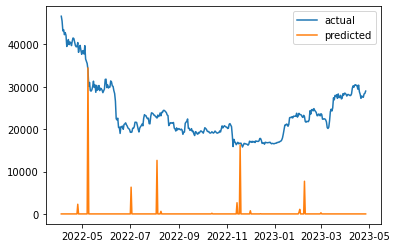

In [288]:
# plot the actual values and the predicted values
plt.plot(test['Date'], test['Price'].values, label='actual')
plt.plot(test['Date'], y_pred, label='predicted')
plt.legend()
plt.show()

In [241]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# calculate the RMSE
rmse = np.sqrt(np.mean((test['Price'].values - y_pred)**2))
print("RMSE:", rmse)

# calculate the MAPE
mape = np.mean(np.abs((test['Price'].values - y_pred) / test['Price'].values)) * 100
print("MAPE:", mape)

# calculate the MAE
mae = np.mean(np.abs(test['Price'].values - y_pred))
print("MAE:", mae)

RMSE: 2.1111593349533776e-12
MAPE: 4.711715081876503e-15
MAE: 1.1222556731388317e-12


In [283]:
X

array([[13850.5],
       [13444.9],
       [14754.1],
       ...,
       [48299.9],
       [47240.8],
       [43012.3]])

In [284]:
y

array([13444.9, 14754.1, 15156.6, ..., 47238.7, 42870.6, 40651.3])

In [253]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [254]:
df

,Price,Open,High,Low,Vol,Change
Date,,,,,,
2018-01-01,13444.9,13850.5,13921.5,12877.7,78430,-0.0293
2018-01-02,14754.1,13444.9,15306.1,12934.2,137730,0.0974
2018-01-03,15156.6,14754.1,15435.0,14579.7,106540,0.0273
2018-01-04,15180.1,15156.5,15408.7,14244.7,110970,0.0015
2018-01-05,16954.8,15180.1,17126.9,14832.4,141960,0.1169
...,...,...,...,...,...,...
2021-09-17,47282.8,47748.2,48155.9,46788.8,50160,-0.0097
2021-09-18,48306.7,47283.9,48761.0,47070.5,43640,0.0217
2021-09-19,47238.7,48299.9,48341.9,46866.6,41980,-0.0221
